先打ち時の火力と勝敗の関係を出力

In [1]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import os
import collections

In [2]:
folder = "puyopuyo_saikyo_league/stats/s1_day1_momoken_rein_2"
games = 57

In [3]:
#先打ち時の火力
#回収率リストを作成
#本線(≠セカンド)に絞る

sakiuchi_tokuten_1P_win = []
sakiuchi_tokuten_2P_win = []
sakiuchi_tokuten_1P_lose = []
sakiuchi_tokuten_2P_lose = []


for i in range(games):
    #ファイル読み込み
    filepath = folder + "/" + str(i) + "_6.csv"
    df_game = pd.read_csv(filepath)
    N = len(df_game["Frame"])

    if 1 in list(df_game["Honsen"].loc[df_game["Rensa"]>5]):
        honsen_index = min(df_game.index[(df_game["Honsen"] == 1) & (df_game["Rensa"] > 5)].tolist())
        if df_game["Win"].iloc[0] == 1:
            if df_game["Player"].iloc[honsen_index] == 1:
                tmp = max(list(df_game["Tokuten"].loc[(df_game["Honsen"]==1)&(df_game["Player"]==1)]))
                if (10000<= tmp <= 160000):
                    sakiuchi_tokuten_1P_win.append(tmp)
            else:
                tmp = max(list(df_game["Tokuten"].loc[(df_game["Honsen"]==1)&(df_game["Player"]==2)]))
                if (10000<= tmp <= 160000):
                    sakiuchi_tokuten_2P_lose.append(tmp)

        else:
            if df_game["Player"].iloc[honsen_index] == 2:
                tmp = max(list(df_game["Tokuten"].loc[(df_game["Honsen"]==1)&(df_game["Player"]==2)]))
                if (10000 <= tmp <= 160000):
                    sakiuchi_tokuten_2P_win.append(tmp)
            else:
                tmp = max(list(df_game["Tokuten"].loc[(df_game["Honsen"]==1)&(df_game["Player"]==1)]))
                if (10000 <= tmp <= 160000):
                    sakiuchi_tokuten_1P_lose.append(tmp)

    
#1~20000点、20001~40000点、40001~60000点、60001~80000点、80001~100000点、100001~120000点, 120001~140000点ごとの数を出力
w_1P = []
l_1P = []
w_2P = []
l_2P = []

for i in range(7):
    w_1P.append(sum(((i*20000)<x<(i*20000+20001)) for x in sakiuchi_tokuten_1P_win))
    l_1P.append(sum(((i*20000)<x<(i*20000+20001)) for x in sakiuchi_tokuten_1P_lose))
    w_2P.append(sum(((i*20000)<x<(i*20000+20001)) for x in sakiuchi_tokuten_2P_win))
    l_2P.append(sum(((i*20000)<x<(i*20000+20001)) for x in sakiuchi_tokuten_2P_lose))
    
df_sakiuchi_tokuten = pd.DataFrame(list(zip(w_1P, l_1P, w_2P, l_2P)), columns=["1P勝利", "1P敗北", "2P勝利", "2P敗北"],
                              index=["1～20000点", "20001～40000点", "40001～60000点", "60001～80000点", "80001～100000点",
                                     "100001～120000点", "120001～140000点"])   
df_sakiuchi_tokuten

,1P勝利,1P敗北,2P勝利,2P敗北
1～20000点,1,1,3,2
20001～40000点,1,1,2,2
40001～60000点,6,2,1,0
60001～80000点,4,0,4,3
80001～100000点,3,0,0,0
100001～120000点,0,0,1,0
120001～140000点,0,0,0,0


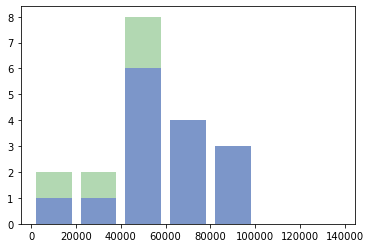

In [4]:
#pythonコード上でもグラフ出力, 1P側
#ヒストグラムの作り方に誤りがあったのでS2からこちらを使います
plt.figure()
plt.hist(sakiuchi_tokuten_1P_win+sakiuchi_tokuten_1P_lose, list(range(1, 140002, 20000)), alpha=0.3, color="g", align="mid", rwidth=0.8)
plt.hist(sakiuchi_tokuten_1P_win,list(range(1, 140002, 20000)), alpha=0.3, color='b',  align="mid", rwidth=0.8)
plt.xticks(list(range(0, 140002, 20000)))
plt.show()

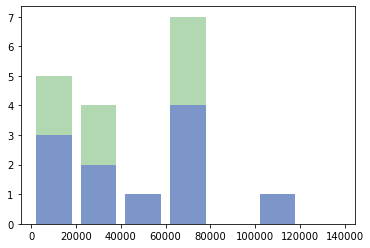

In [5]:
#pythonコード上でもグラフ出力, 1P側
#ヒストグラムの作り方に誤りがあったのでS2からこちらを使います
plt.figure()
plt.hist(sakiuchi_tokuten_2P_win+sakiuchi_tokuten_2P_lose, list(range(1, 140002, 20000)), alpha=0.3, color="g", align="mid", rwidth=0.8)
plt.hist(sakiuchi_tokuten_2P_win,list(range(1, 140002, 20000)), alpha=0.3, color='b',  align="mid", rwidth=0.8)
plt.xticks(list(range(0, 140002, 20000)))
plt.show()